## Aim

To apply K-Nearest Neighbors Clustering Algorithm on Iris Dataset, and find the optimal number of clusters and optimal training and test data size, and also evaluate the model with appropriate metrics.

## Algorithm

1. Import the required libraries and dataet.
2. Split the dataset into data and target.
3. In a range of k = 1 to k = 30, find the value of K for which KNN model gives least error. This K is the optimal value for k.
4. In a range of size = 0.1 to size = 0.9, find the value of size for which the train data split gives the least error. This is the optimal value for train_split.
5. Fit the model with the above estimated parameters, and measure the accuracy, recall, precision and ROC.

## Code

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importing the dataset

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
print('Target Names: ', data.target_names)
print('\nFeature Names: ', data.feature_names)

Target Names:  ['setosa' 'versicolor' 'virginica']

Feature Names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
X = data.data      # Data attributes
y = data.target    # Target Labels
print('Number of examples in the data:', X.shape)

Number of examples in the data: (150, 4)


### Splitting into train and test sets

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Finding the optimal value of K using 10 fold cross validation

In [5]:
neighbors = []
cv_scores = []
k_range = list(range(1,30))

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
for i in k_range:
    neighbors.append(i)
    knn = KNeighborsClassifier(n_neighbors = i)
    
    #Performing 10 fold cross-validation
    
    scores = cross_val_score(knn,x_train,y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

In [6]:
cv_scores

[0.9583333333333334,
 0.95,
 0.9666666666666666,
 0.975,
 0.9666666666666666,
 0.9833333333333332,
 0.9833333333333332,
 0.9583333333333333,
 0.9666666666666666,
 0.9666666666666666,
 0.9666666666666666,
 0.9749999999999999,
 0.9749999999999999,
 0.9749999999999999,
 0.9666666666666666,
 0.9666666666666666,
 0.9666666666666666,
 0.9416666666666667,
 0.9416666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9416666666666667,
 0.9416666666666667,
 0.9416666666666667,
 0.95,
 0.9499999999999998,
 0.9333333333333333,
 0.9416666666666667]

Text(0, 0.5, 'Cross Validation Score')

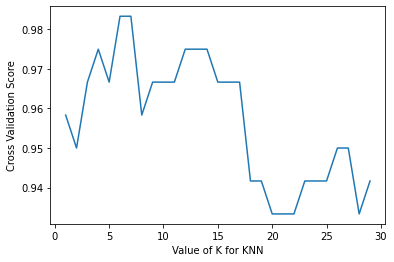

In [7]:
plt.plot(k_range, cv_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross Validation Score')

In [8]:
MSE = [1-x for x in cv_scores]

best_k = neighbors[MSE.index(min(MSE))]
print(f'The optimal number of neighbors is: {best_k}')

The optimal number of neighbors is: 6


### Fitting the model

In [9]:
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

### Predicting the results

In [10]:
y_pred = model.predict(x_test)
y_pred

array([2, 0, 2, 1, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2,
       0, 2, 0, 1, 2, 0, 2, 0])

### Classification Report

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [12]:
print('Accuracy of Model: {}'.format(accuracy_score(y_test, y_pred)))
print('Precision of Model: {}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Recall of Model: {}\n'.format(recall_score(y_test, y_pred, average='weighted')))
print(classification_report(y_test, y_pred))

Accuracy of Model: 0.9666666666666667
Precision of Model: 0.9700000000000001
Recall of Model: 0.9666666666666667

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



### Finding the optimal train_split value

In [13]:
split_size = [0.1]

size = 0.1
while size < 0.8:
    size += 0.1
    split_size.append(round(size, 1))

split_size

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [14]:
acc_score = []

for size in split_size:
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=size)
    model = KNeighborsClassifier(n_neighbors=best_k)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc_score.append(accuracy_score(y_test, y_pred))

acc_score

[0.6518518518518519,
 0.8583333333333333,
 0.9619047619047619,
 0.9888888888888889,
 0.9466666666666667,
 1.0,
 0.9111111111111111,
 0.9333333333333333,
 0.9333333333333333]

Text(0, 0.5, 'Accuracy of KNN for k=15')

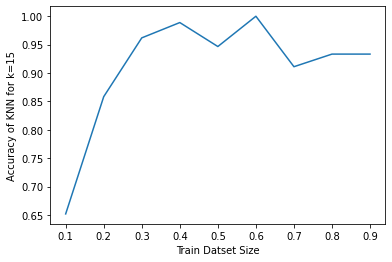

In [15]:
plt.plot(split_size, acc_score)
plt.xlabel('Train Datset Size')
plt.ylabel('Accuracy of KNN for k=15')

In [16]:
MSE = [1-x for x in acc_score]

best_size = split_size[MSE.index(min(MSE))]
print(f'The optimal split size for train data is : {best_size}')

The optimal split size for train data is : 0.6


### Fitting the model to the optimal values

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=best_size)

model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print('Accuracy of Model: {}'.format(accuracy_score(y_test, y_pred)))
print('Precision of Model: {}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Recall of Model: {}\n'.format(recall_score(y_test, y_pred, average='weighted')))
print(classification_report(y_test, y_pred))

Accuracy of Model: 0.9666666666666667
Precision of Model: 0.9696969696969696
Recall of Model: 0.9666666666666667

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.92      0.96        24
           2       0.91      1.00      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



### ROC Curve for the KNN model

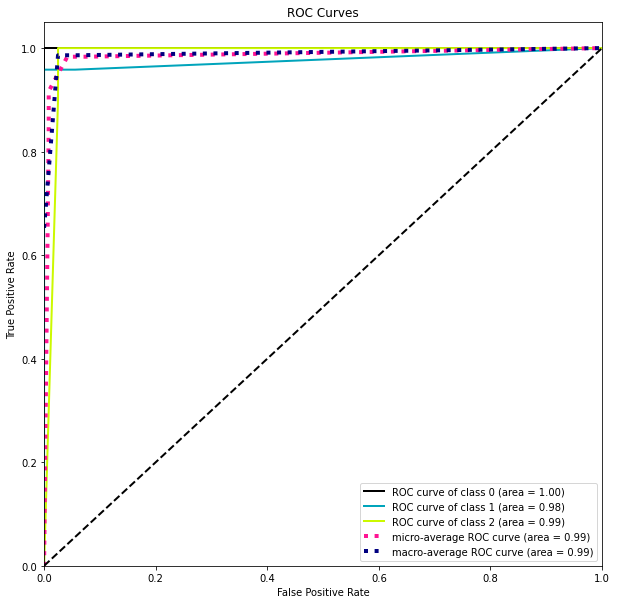

In [18]:
predicted_probas = model.predict_proba(x_test)

import matplotlib.pyplot as plt
import scikitplot as skplt
plt.rcParams["figure.figsize"] = (10,10)
skplt.metrics.plot_roc(y_test, predicted_probas)
plt.show()

## Conclusion

We conclude that the KNN model has an **accuracy of 96.67%** with **k=15** and **train_split=0.6**